In [1]:
import numpy as np
from common.layers import MatMul

c = np.array([[1, 0, 0, 0, 0, 0, 0]])
w = np.random.randn(7, 3)
layer = MatMul(w)
h = layer.forward(c)
h

array([[ 0.34583974, -1.17097983, -0.08817798]])

In [2]:
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

w_in = np.random.randn(7, 3)
w_out = np.random.randn(3, 7)

in_layer0 = MatMul(w_in)
in_layer1 = MatMul(w_in)
out_layer = MatMul(w_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

s

array([[-0.24123514,  0.07865997, -0.51392022,  0.02251349,  0.32898575,
        -0.44202285,  0.52919999]])

In [9]:
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [10]:
text

'You say goodbye and I say hello.'

In [11]:
corpus, word_to_id, id_to_word

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

In [45]:
import numpy as np
def create_contexts_target(corpus, window_size=1):
    length = len(corpus)
    contexts_lst, target_lst = [], [] 
    for i in range(window_size, length-window_size):
        target_lst += [corpus[i]]
        contexts_lst += [np.c_[corpus[i-window_size:i], corpus[i+1:i+1+window_size]][0]]
    return np.array(contexts_lst), np.array(target_lst)

In [46]:
np.c_[corpus[0:1], corpus[2:3]][0]

array([0, 2])

In [47]:
contexts, target = create_contexts_target(corpus)

[0 2]
[1 3]
[2 4]
[3 1]
[4 5]
[1 6]


In [48]:
contexts, target

(array([[0, 2],
        [1, 3],
        [2, 4],
        [3, 1],
        [4, 5],
        [1, 6]]),
 array([1, 2, 3, 4, 1, 5]))

In [49]:
from common.util import convert_one_hot

vocab_size = len(word_to_id)
contexts, target = convert_one_hot(contexts, vocab_size), convert_one_hot(target, vocab_size)

In [51]:
contexts.shape, target.shape

((6, 2, 7), (6, 7))

In [53]:
from common.layers import MatMul, SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        w_in = 0.01 * np.random.randn(vocab_size, hidden_size).astype('f')
        w_out = 0.01 * np.random.randn(hidden_size, vocab_size).astype('f')
        
        self.in_layer0 = MatMul(w_in)
        self.in_layer1 = MatMul(w_in)
        self.out_layer = MatMul(w_out)
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = w_in
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 347 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 348 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 349 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 350 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 351 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 352 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 353 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 354 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 355 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 356 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 357 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 358 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 359 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 360 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 361 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 362 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 363 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 364 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 365 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 366 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 367 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 368 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 369 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 370 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 371 |  반복 1

| 에폭 653 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 654 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 655 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 656 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 657 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 658 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 659 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 660 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 661 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 662 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 663 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 664 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 665 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 666 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 667 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 668 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 669 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 670 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 671 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 672 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 673 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 674 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 675 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 676 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 677 |  반복 1

C:\Users\sinjy\anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sinjy\anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sinjy\anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sinjy\anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sinjy\anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sinjy\an

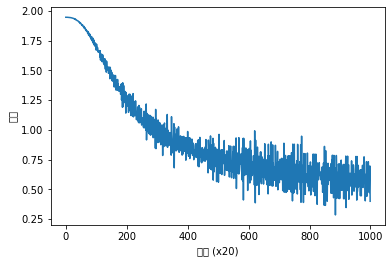

In [54]:
from common.trainer import Trainer
from common.optimizer import Adam

model = SimpleCBOW(vocab_size, hidden_size=5)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch=1000, batch_size=3)
trainer.plot()

In [55]:
for i in range(vocab_size):
    print(id_to_word[i], model.word_vecs[i])

you [ 1.1177374  1.1522571 -1.1485522  1.2059749 -1.2100352]
say [-1.2150389  -1.2210029   1.1794504  -0.11941093  1.1946759 ]
goodbye [ 0.73487025  0.7292766  -0.7950334   0.8313492  -0.67571974]
and [-0.99239707 -0.9946408   1.0008417  -1.8541307   0.98115385]
i [ 0.7575146   0.73420197 -0.8143475   0.8443665  -0.6817719 ]
hello [ 1.1113473  1.1568872 -1.1140476  1.1949984 -1.2204657]
. [-1.0680358 -1.0598695  0.9938919  1.7188426  1.0158012]
